In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import matplotlib
import scipy.optimize as opt
from sklearn.metrics import classification_report

In [14]:
def load_data(path,transpose=True):
    data = sio.loadmat(path)
    y = data.get('y')
    y = y.reshape(y.shape[0])
    X = data.get('X')
    if transpose:
        X = np.array([im.reshape((20,20)).T for im in X])
        X = np.array([im.reshape(400) for im in X])
    return X,y
X,y = load_data('ex3data1.mat')
print(X.shape,y.shape)

(5000, 400) (5000,)


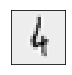

this should be 4


In [15]:
def plot_an_image(image):
    fig,ax=plt.subplots(figsize=(1,1))
    ax.matshow(image.reshape((20,20)),cmap=matplotlib.cm.binary)
    plt.xticks([])
    plt.yticks([])
pick_one = np.random.randint(0,5000)
plot_an_image(X[pick_one,:])
plt.show()
print('this should be {}'.format(y[pick_one]))

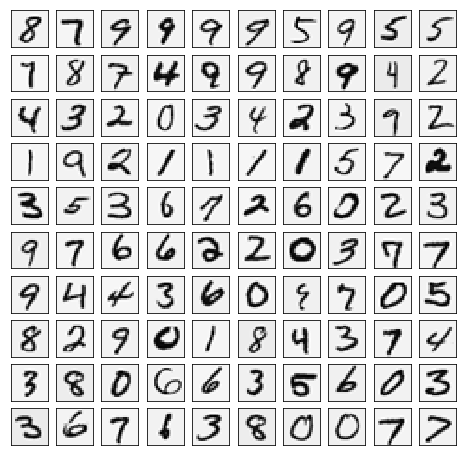

In [16]:
def plot_100_image(X):
    size = int(np.sqrt(X.shape[1]))
    sample_idx = np.random.choice(np.arange(X.shape[0]),100)
    sample_images = X[sample_idx,:]

    fig,ax_array = plt.subplots(nrows=10,ncols=10,sharey=True,sharex=True,figsize=(8,8))
    for r in range(10):
        for c in range(10):
            ax_array[r,c].matshow(sample_images[10*r+c].reshape((size,size)),cmap=matplotlib.cm.binary)
            plt.xticks([])
            plt.yticks([])
plot_100_image(X)
plt.show()

In [17]:
raw_X,raw_y = load_data('ex3data1.mat')
X = np.insert(raw_X,0,values=np.ones(raw_X.shape[0]),axis=1)
X.shape

(5000, 401)

In [18]:
y_matrix = []
for k in range(1,11):
    y_matrix.append((raw_y==k).astype(int))
y_matrix = [y_matrix[-1]]+y_matrix[:-1]
y = np.array(y_matrix)
y.shape

(10, 5000)

In [19]:
y

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]])

### 逻辑回归分类

训练一维模型

In [27]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def cost(theta,X,y):
    return np.mean(-y*np.log(sigmoid(X@theta))-(1-y)*np.log(1-sigmoid(X@theta)))

def gradient(theta,X,y):
    return (1/len(X))*X.T@(sigmoid(X@theta)-y)

def regularized_cost(theta,X,y,l=1):
    theta_j1_to_n = theta[1:]
    regularized_term = (1/(2*len(X)))*np.power(theta_j1_to_n,2).sum()
    return cost(theta,X,y)+regularized_term

def regularized_gradient(theta,X,y,l=1):
    theta_j1_to_n = theta[1:]
    regularized_theta = (1/len(X))*theta_j1_to_n
    regularized_term = np.concatenate([np.array([0]),regularized_theta])
    return gradient(theta,X,y)+regularized_term

def logistic_regression(X,y,l=1):
    theta = np.zeros(X.shape[1])
    res = opt.minimize(fun=regularized_cost,x0=theta,args=(X,y,l),method='TNC',jac=regularized_gradient,options={'disp':True})
    final_theta = res.x
    return final_theta

def predict(x,theta):
    prob = sigmoid(x@theta)
    return (prob>=0.5).astype(int)
    
# y = np.array(y)
t0 = logistic_regression(X,y[0])
print(t0.shape)
y_pred = predict(X,t0)
print('Accuracy={}'.format(np.mean(y[0]==y_pred)))

(401,)
Accuracy=0.9974


训练k维模型

In [41]:
k_theta = np.array([logistic_regression(X, y[k]) for k in range(10)])
k_theta.shape

(10, 401)

In [43]:
prob_matrix = sigmoid(X@k_theta.T)
np.set_printoptions(suppress=True)
prob_matrix

array([[0.99577534, 0.        , 0.00053517, ..., 0.00006468, 0.00003916,
        0.00171968],
       [0.99834703, 0.0000001 , 0.00005614, ..., 0.0000968 , 0.00000291,
        0.00008484],
       [0.99139921, 0.        , 0.00056784, ..., 0.00000655, 0.02653767,
        0.00197348],
       ...,
       [0.00000068, 0.0413743 , 0.00321379, ..., 0.00012717, 0.00297483,
        0.7075607 ],
       [0.00001844, 0.00000013, 0.00000009, ..., 0.00164812, 0.06812165,
        0.86121491],
       [0.02878504, 0.        , 0.00012979, ..., 0.36623672, 0.00498502,
        0.14815734]])

In [44]:
y_pred = np.argmax(prob_matrix,axis=1)
# 返回沿轴axis最大值的索引
y_pred

array([0, 0, 0, ..., 9, 9, 7], dtype=int64)

In [46]:
y_answer = raw_y.copy()
y_answer[y_answer==10]=0
classification_report(y_answer,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98       500\n           1       0.95      0.99      0.97       500\n           2       0.95      0.92      0.93       500\n           3       0.95      0.91      0.93       500\n           4       0.95      0.95      0.95       500\n           5       0.92      0.92      0.92       500\n           6       0.97      0.98      0.97       500\n           7       0.95      0.95      0.95       500\n           8       0.93      0.92      0.92       500\n           9       0.92      0.92      0.92       500\n\n    accuracy                           0.94      5000\n   macro avg       0.94      0.94      0.94      5000\nweighted avg       0.94      0.94      0.94      5000\n'

In [48]:
# 读取保存好的神经网络参数
def load_weight(path):
    data = sio.loadmat(path)
    return data['Theta1'],data['Theta2']

theta1,theta2 = load_weight('ex3weights.mat')
theta1.shape,theta2.shape

((25, 401), (10, 26))

In [49]:
X,y = load_data('ex3data1.mat',transpose=False)
X = np.insert(X,0,values=np.ones(X.shape[0]),axis=1)
X.shape,y.shape

((5000, 401), (5000,))

In [54]:
a1 = X
z2 = a1@theta1.T
z2.shape

(5000, 25)

In [55]:
z2 = np.insert(z2,0,values=np.ones(z2.shape[0]),axis=1)
a2 = sigmoid(z2)
a2.shape



(5000, 26)

In [56]:

z3 = a2@theta2.T
z3.shape

(5000, 10)

In [57]:
a3 = sigmoid(z3)
a3

array([[0.00013825, 0.0020554 , 0.00304012, ..., 0.00049102, 0.00774326,
        0.99622946],
       [0.00058776, 0.00285027, 0.00414688, ..., 0.00292311, 0.00235617,
        0.99619667],
       [0.00010868, 0.0038266 , 0.03058551, ..., 0.07514539, 0.0065704 ,
        0.93586278],
       ...,
       [0.06278247, 0.00450406, 0.03545109, ..., 0.0026367 , 0.68944816,
        0.00002744],
       [0.00101909, 0.00073436, 0.00037856, ..., 0.01456166, 0.97598976,
        0.00023337],
       [0.00005908, 0.00054172, 0.0000259 , ..., 0.00700508, 0.73281465,
        0.09166961]])

In [58]:
y_pred = np.argmax(a3,axis=1)+1
y_pred.shape

(5000,)

In [59]:
classification_report(y,y_pred)

'              precision    recall  f1-score   support\n\n           1       0.97      0.98      0.97       500\n           2       0.98      0.97      0.97       500\n           3       0.98      0.96      0.97       500\n           4       0.97      0.97      0.97       500\n           5       0.98      0.98      0.98       500\n           6       0.97      0.99      0.98       500\n           7       0.98      0.97      0.97       500\n           8       0.98      0.98      0.98       500\n           9       0.97      0.96      0.96       500\n          10       0.98      0.99      0.99       500\n\n    accuracy                           0.98      5000\n   macro avg       0.98      0.98      0.98      5000\nweighted avg       0.98      0.98      0.98      5000\n'